In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df: pd.DataFrame = pd.read_csv("./dataset/HI-Small_Trans.csv")
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [3]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [4]:
df["Timestamp"]: pd.Series = pd.to_datetime(df["Timestamp"], errors="raise")

In [5]:
df.rename(columns={"Is Laundering": "y"}, inplace=True)

<Axes: xlabel='y'>

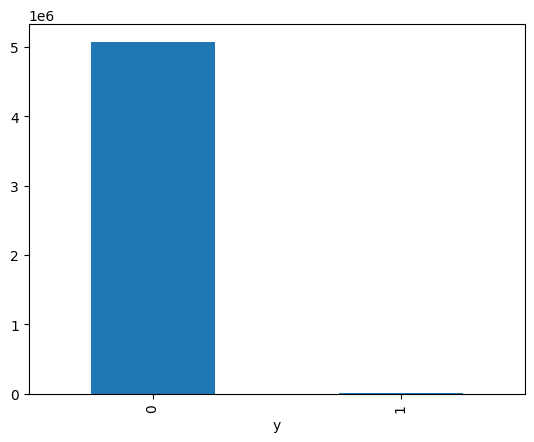

In [6]:
df["y"].value_counts().plot(kind="bar")

In [7]:
df.describe()

,Timestamp,From Bank,To Bank,Amount Received,Amount Paid,y
count,5078345,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,2022-09-05 07:16:08.194274816,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
min,2022-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2022-09-02 04:32:00,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,2022-09-05 12:16:00,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2022-09-08 03:13:00,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,2022-09-18 16:18:00,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00
std,NaN,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02


In [8]:
print(f"Total rows in dataset: {df.shape[0]:,} and {df.shape[1]:,} columns")
print("-----------")

print(f"Unique elements in 'Account' feature: {df['Account'].unique().shape[0]:,}")
print(f"Unique elements in 'Account.1' feature: {df['Account.1'].unique().shape[0]:,}")

print(f"Unique elements in 'Receiving Currency' feature: {df['Receiving Currency'].unique().shape[0]:,}")
print(f"Unique elements in 'Payment Currency' feature: {df['Payment Currency'].unique().shape[0]:,}")

print(f"Unique elements in 'Payment Format' feature: {df['Payment Format'].unique().shape[0]:,}")

Total rows in dataset: 5,078,345 and 11 columns
-----------
Unique elements in 'Account' feature: 496,995
Unique elements in 'Account.1' feature: 420,636
Unique elements in 'Receiving Currency' feature: 15
Unique elements in 'Payment Currency' feature: 15
Unique elements in 'Payment Format' feature: 7


In [ ]:
import os
from pathlib import Path
import cloudpickle as cp
from sklearn.preprocessing import LabelEncoder

account_le_path: Path = Path("pickle-dumps/account_le.pkl")
if os.path.exists(account_le_path):
    with open(account_le_path, "rb") as f:
        account_le: LabelEncoder = cp.load(f)    

    df["Account"]: pd.Series = account_le.fit_transform(df["Account"])
else:
    account_le_path.parent.mkdir(parents=False, exist_ok=True)
    account_le: LabelEncoder = LabelEncoder()
    df["Account"]: pd.Series = account_le.fit_transform(df["Account"])

    with open(account_le_path, "wb") as f:
        cp.dump(account_le, f)

del account_le
del account_le_path

In [10]:
account_1_le_path: Path = Path("pickle-dumps/account.1_le.pkl")
if os.path.exists(account_1_le_path):
    with open(account_1_le_path, "rb") as f:
        account_1_le: LabelEncoder = cp.load(f)    

    df["Account.1"]: pd.Series = account_1_le.fit_transform(df["Account.1"])
else:
    account_1_le_path.parent.mkdir(parents=False, exist_ok=True)
    account_1_le: LabelEncoder = LabelEncoder()
    df["Account.1"]: pd.Series = account_1_le.fit_transform(df["Account.1"])
    
    with open(account_1_le_path, "wb") as f:
        cp.dump(account_1_le, f)

del account_1_le
del account_1_le_path

In [11]:
receiving_currency_le_path: Path = Path("pickle-dumps/receiving_currency_le.pkl")
if os.path.exists(receiving_currency_le_path):
    with open(receiving_currency_le_path, "rb") as f:
        receiving_currency_le: LabelEncoder = cp.load(f)    

    df["Receiving Currency"]: pd.Series = receiving_currency_le.fit_transform(df["Receiving Currency"])
else:
    receiving_currency_le_path.parent.mkdir(parents=False, exist_ok=True)
    receiving_currency_le: LabelEncoder = LabelEncoder()
    with open(receiving_currency_le_path, "wb") as f:
        cp.dump(receiving_currency_le, f)

    df["Receiving Currency"]: pd.Series = receiving_currency_le.fit_transform(df["Receiving Currency"])

del receiving_currency_le_path
del receiving_currency_le

In [12]:
payment_currency_le_path: Path = Path("pickle-dumps/payment-currency_le.pkl")
if os.path.exists(payment_currency_le_path):
    with open(payment_currency_le_path, "rb") as f:
        payment_currency_le: LabelEncoder = cp.load(f)    
    
    df["Payment Currency"]: pd.Series = payment_currency_le.fit_transform(df["Payment Currency"])
else:
    payment_currency_le_path.parent.mkdir(parents=False, exist_ok=True)
    payment_currency_le: LabelEncoder = LabelEncoder()
    with open(payment_currency_le_path, "wb") as f:
        cp.dump(payment_currency_le, f)

    df["Payment Currency"]: pd.Series = payment_currency_le.fit_transform(df["Payment Currency"])

del payment_currency_le_path
del payment_currency_le

In [13]:
payment_format_le_path: Path = Path("pickle-dumps/payment-format_le.pkl")
if os.path.exists(payment_format_le_path):
    with open(payment_format_le_path, "rb") as f:
        payment_format_le: LabelEncoder = cp.load(f)    
    
    df["Payment Format"]: pd.Series = payment_format_le.fit_transform(df["Payment Format"])
else:
    payment_format_le_path.parent.mkdir(parents=False, exist_ok=True)
    payment_format_le: LabelEncoder = LabelEncoder()
    with open(payment_format_le_path, "wb") as f:
        cp.dump(payment_format_le, f)

    df["Payment Format"]: pd.Series = payment_format_le.fit_transform(df["Payment Format"])

del payment_format_le_path
del payment_format_le

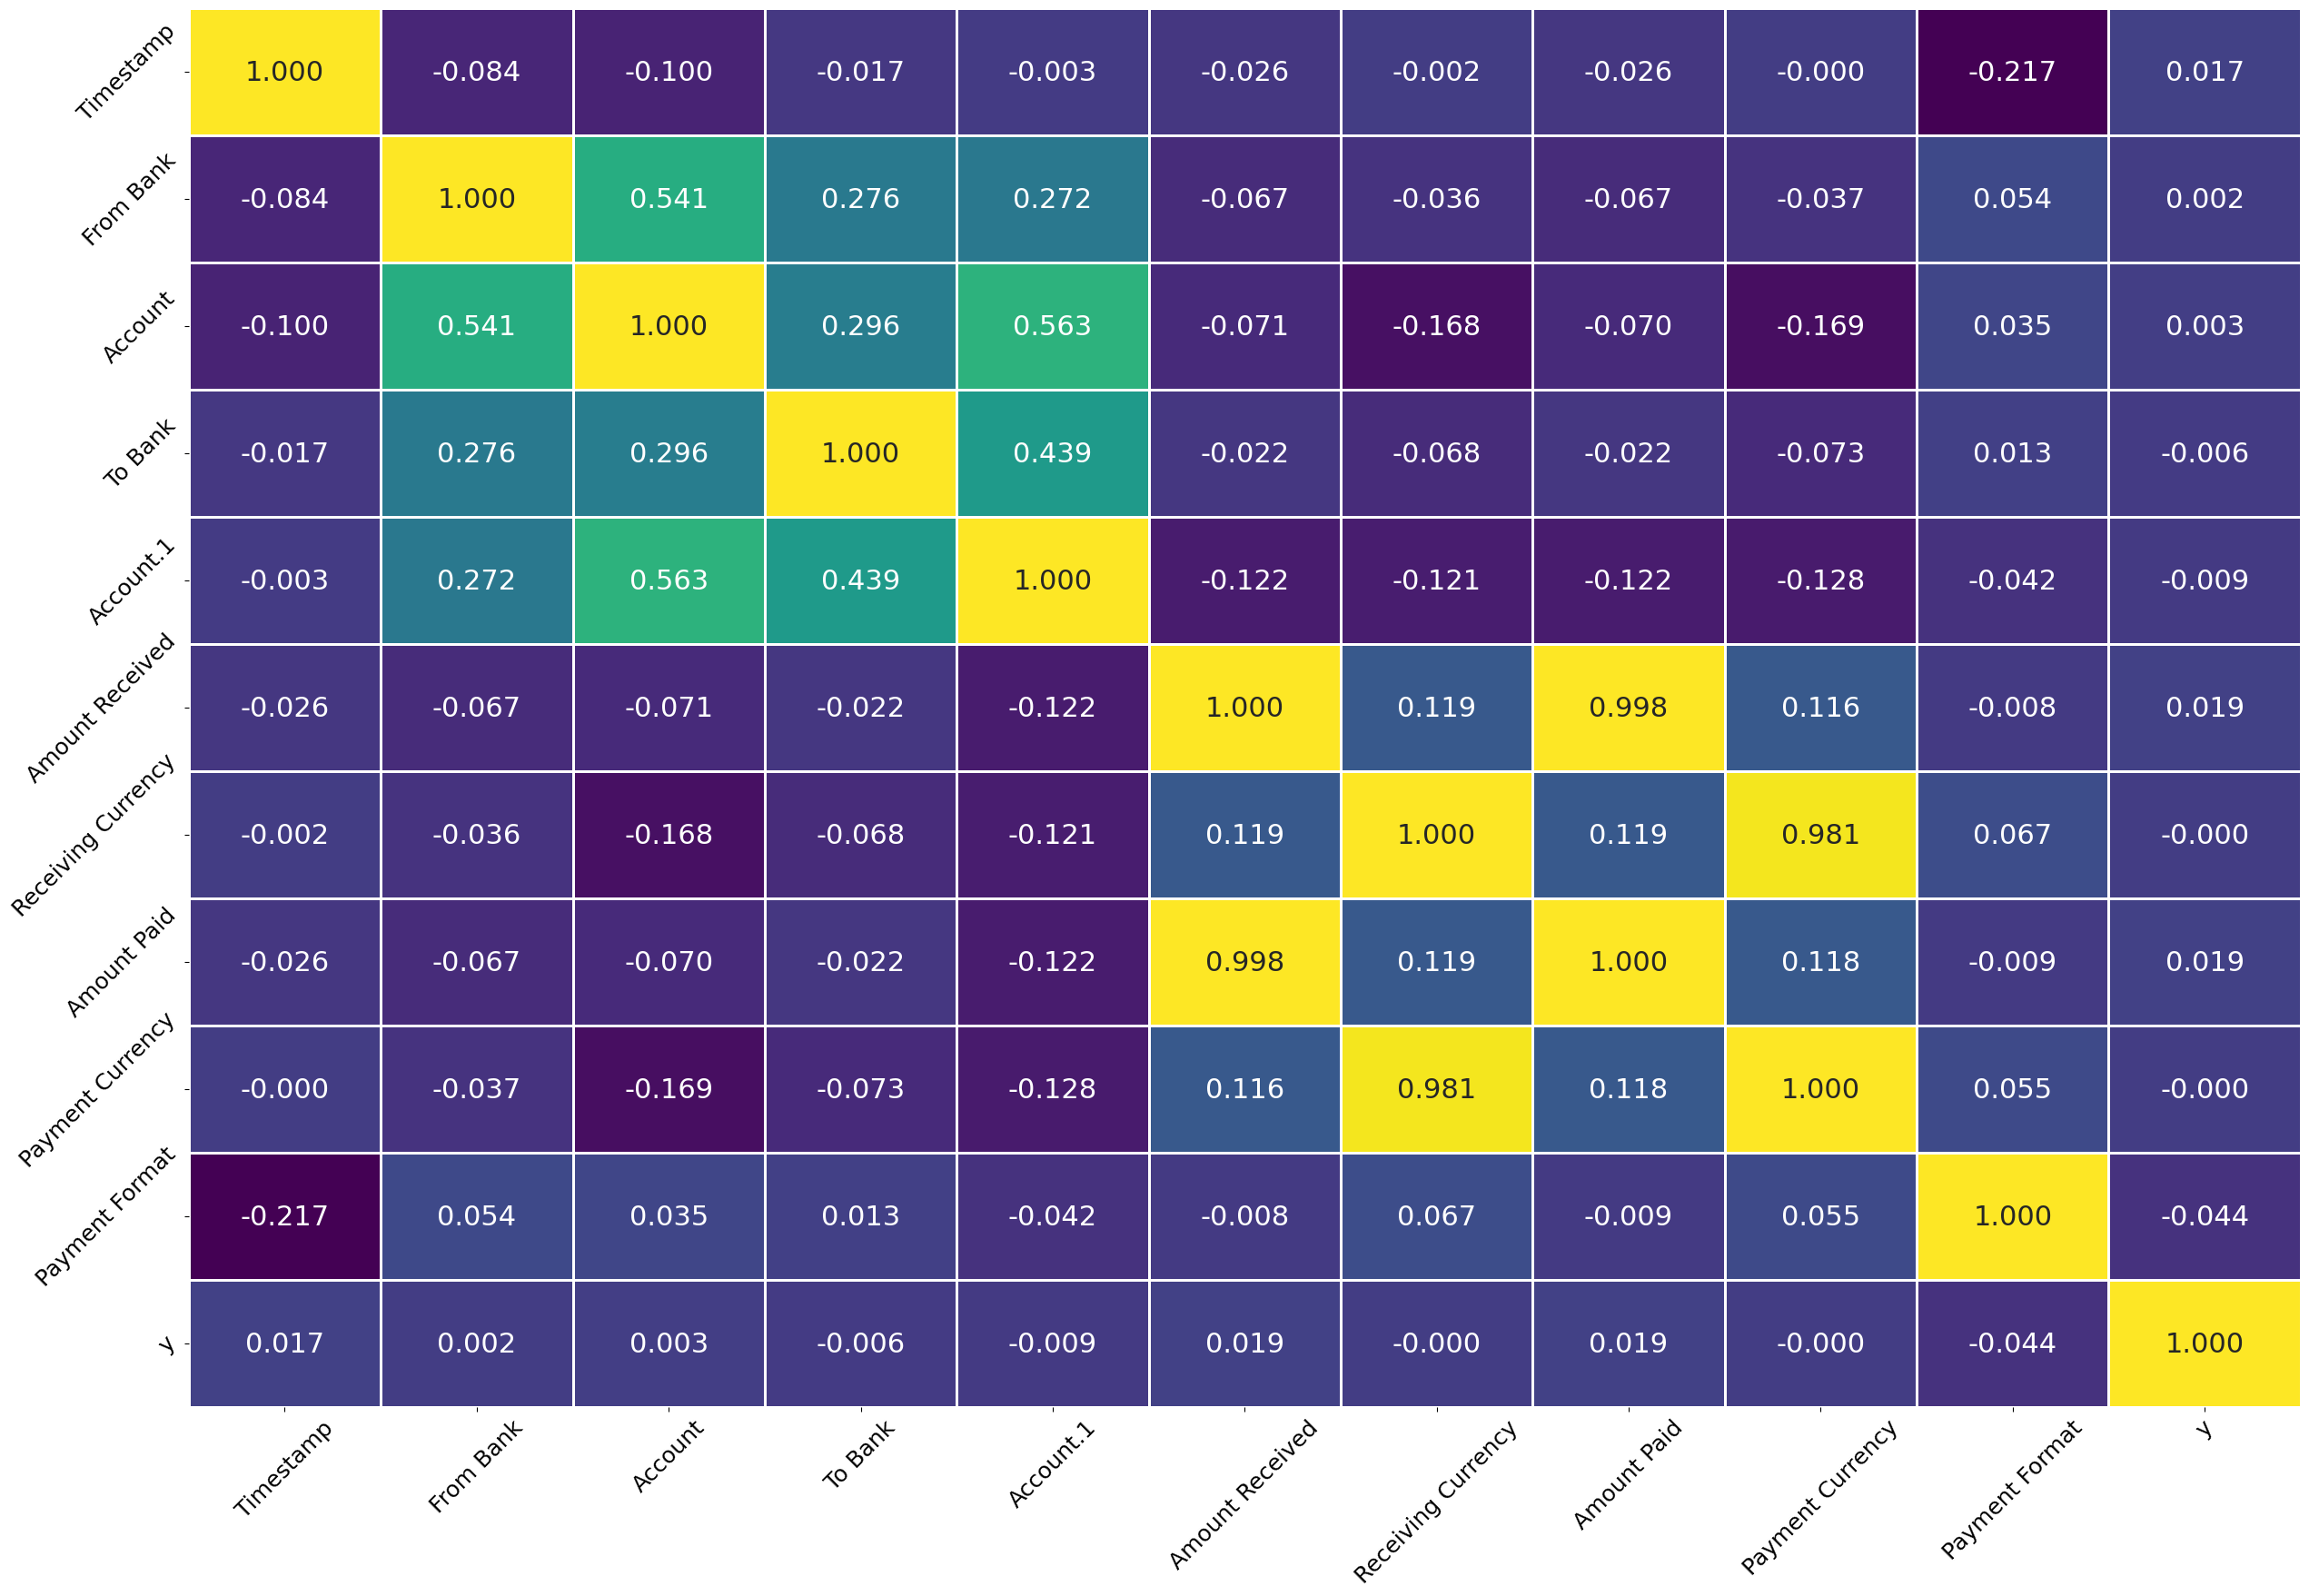

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

corr_map: pd.DataFrame = df.corr(method="spearman", numeric_only=False)

plt.figure(figsize=(30, 20), dpi=100) 
_ = sns.heatmap(
    corr_map, annot=True, annot_kws={"fontsize": 22}, linecolor="white",
    linewidth=1, fmt=".3f", cmap="viridis", cbar=False
)
_ = plt.xticks(fontsize=18, rotation=45)
_ = plt.yticks(fontsize=18, rotation=45)

In [15]:
df["hour"]: pd.Series        = df["Timestamp"].dt.hour
df["day_of_week"]: pd.Series = df["Timestamp"].dt.dayofweek
df["is_weekend"]: pd.Series  = df["day_of_week"].isin([5,6]).astype(int)
df["month"]: pd.Series       = df["Timestamp"].dt.month
df["is_night"]: pd.Series    = ((df["hour"] < 6) | (df["hour"] > 22)).astype(int)

In [16]:
df["from_bank_freq"]: pd.Series    = df["From Bank"].map(df["From Bank"].value_counts())
df["to_bank_freq"]: pd.Series      = df["To Bank"].map(df["To Bank"].value_counts())
df["from_account_freq"]: pd.Series = df["Account"].map(df["Account"].value_counts())
df["to_account_freq"]: pd.Series   = df["Account.1"].map(df["Account.1"].value_counts())

In [17]:
df["amount_diff"]: pd.Series  = df["Amount Received"] - df["Amount Paid"]
df["amount_ratio"]: pd.Series = df["Amount Received"] / (df["Amount Paid"] + 1e-6)

In [18]:
df["currency_mismatch"]: pd.Series = (df["Receiving Currency"] != df["Payment Currency"]).astype(int)

In [19]:
df["is_self_transfer"]: pd.Series = (df["Account"] == df["Account.1"]).astype(int)

In [20]:
df["account_pair"]: pd.Series = df["Account"].astype(str) + "_" + df["Account.1"].astype(str)
df["pair_freq"]: pd.Series    = df["account_pair"].map(df["account_pair"].value_counts())

In [21]:
df["format_freq"]: pd.Series = df["Payment Format"].map(df["Payment Format"].value_counts())

In [22]:
df["total_sent_by_account"]: pd.Series     = df.groupby("Account")["Amount Paid"].transform("sum")
df["total_received_by_account"]: pd.Series = df.groupby("Account.1")["Amount Received"].transform("sum")

In [23]:
df["y"]: pd.Series = df.pop("y")

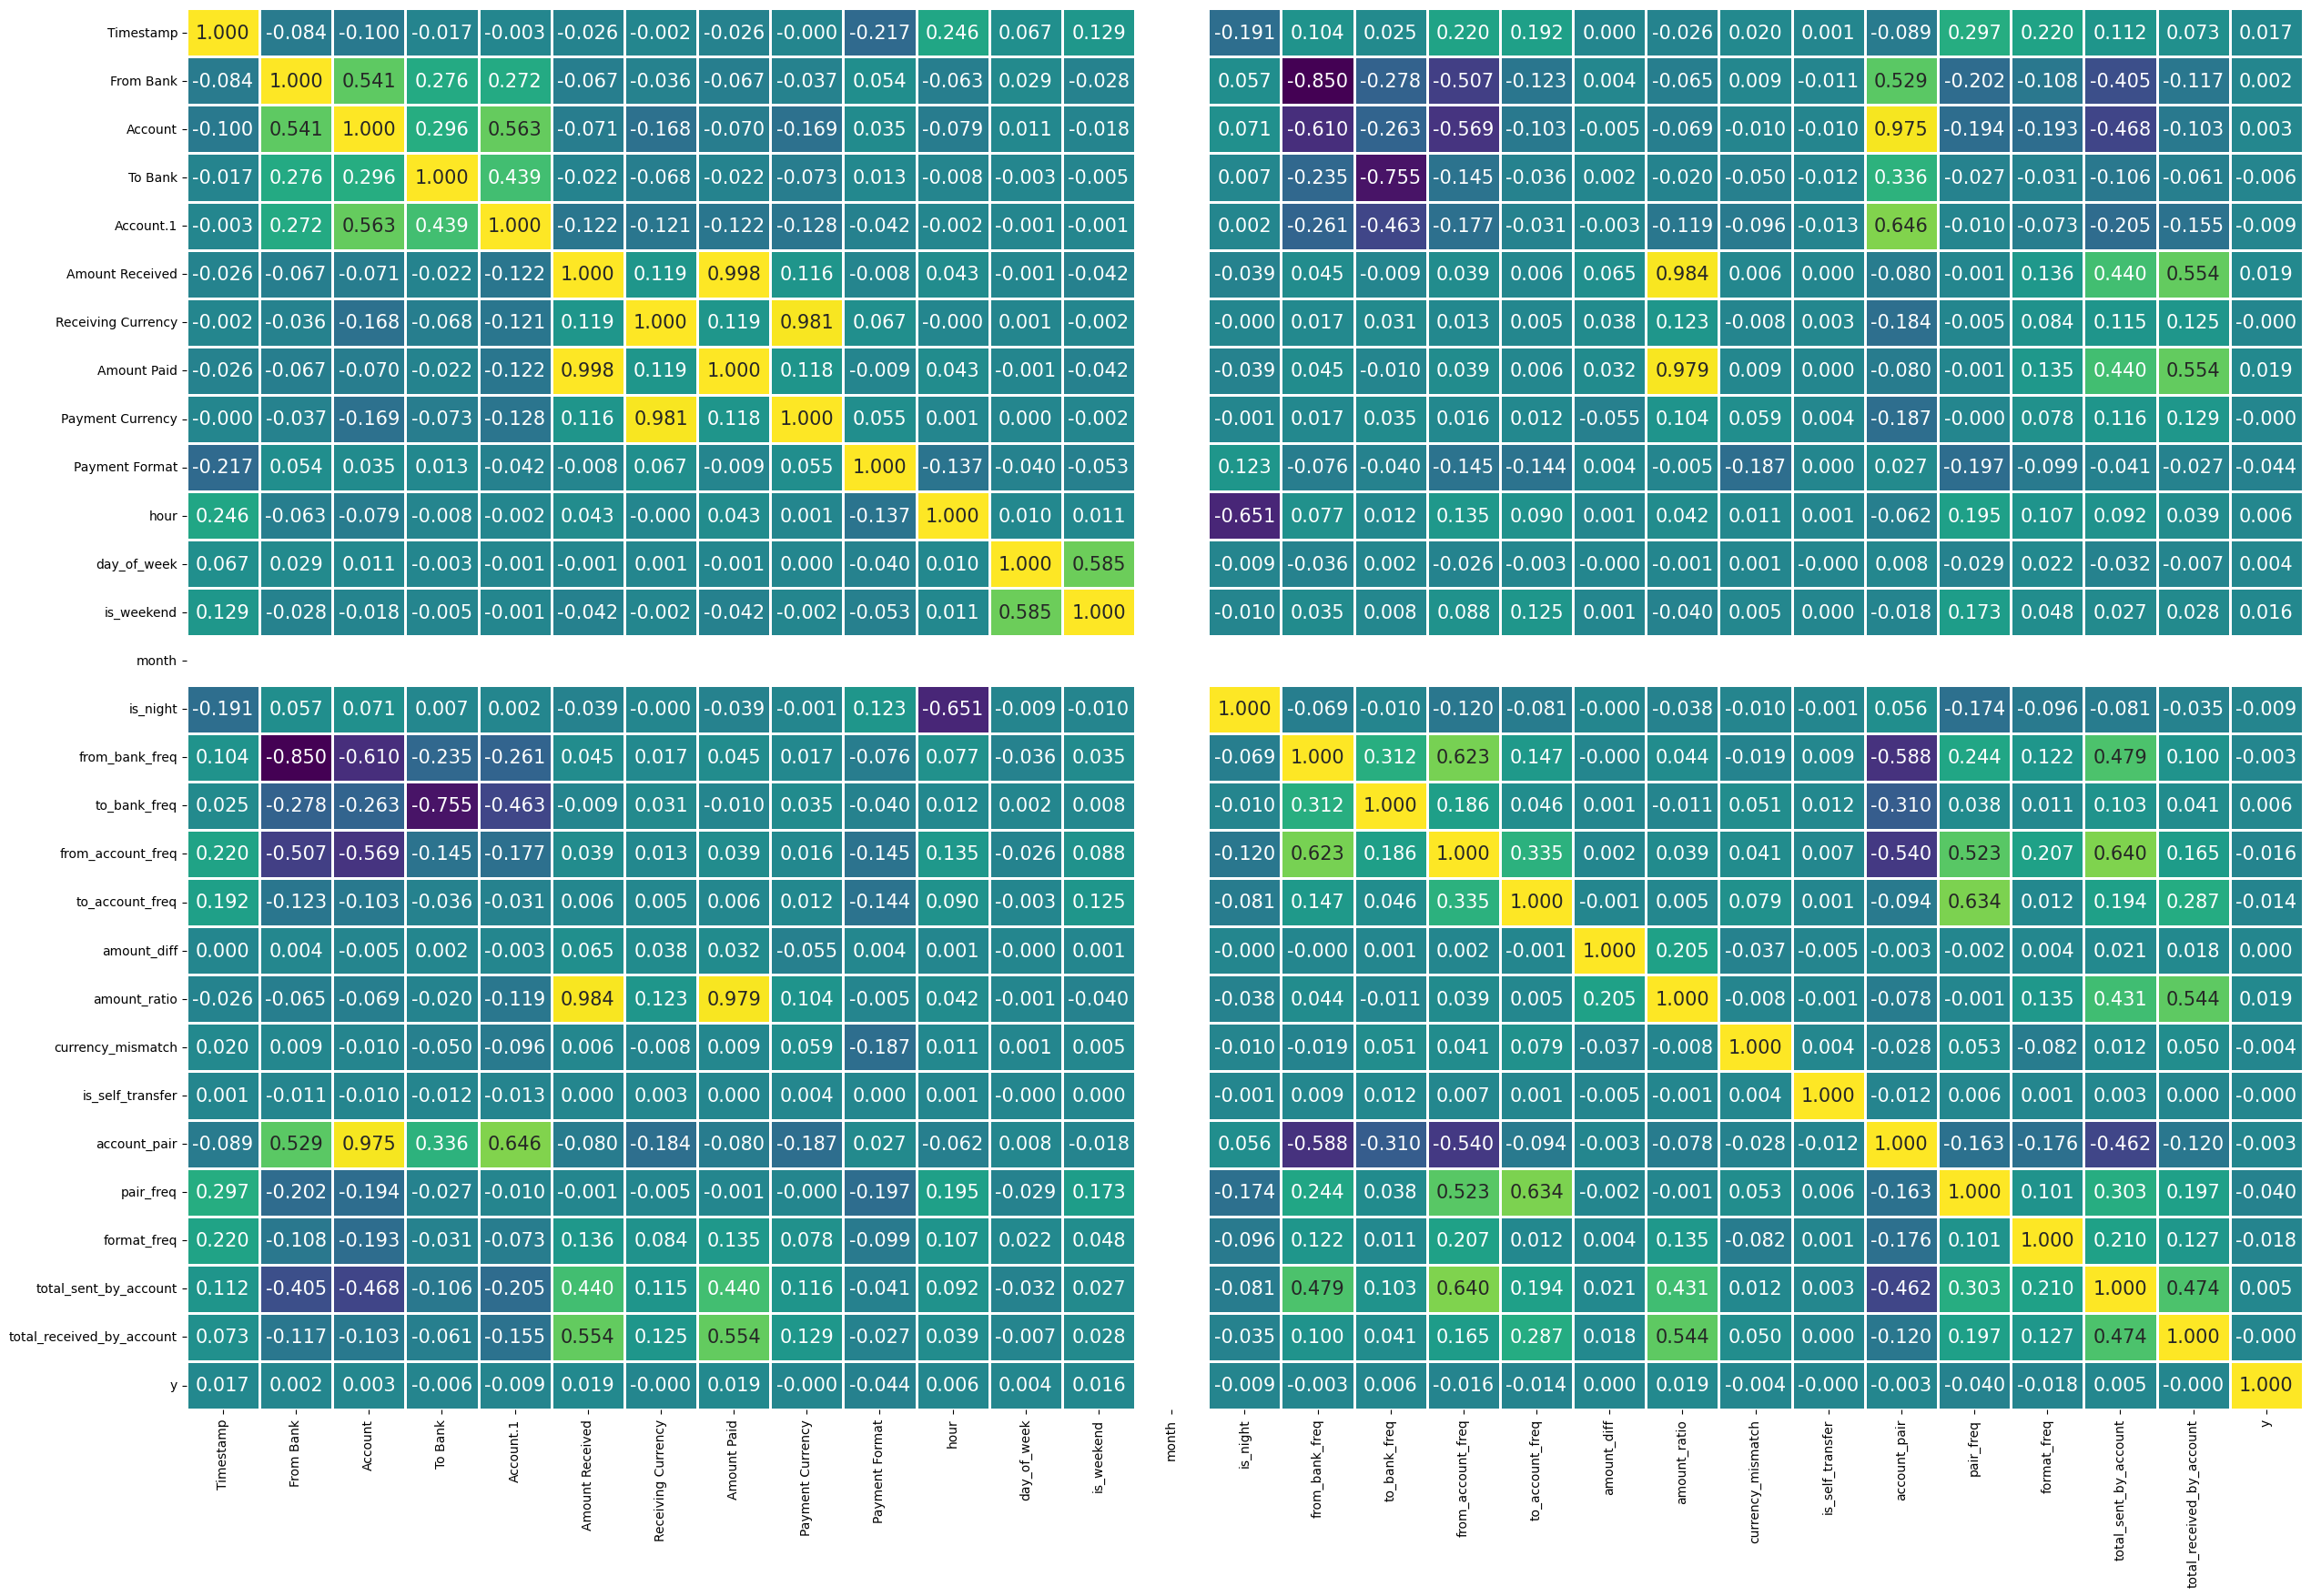

In [24]:
corr_map: pd.DataFrame = df.corr(method="spearman", numeric_only=False)

plt.figure(figsize=(30, 20), dpi=100) 
_ = sns.heatmap(
    corr_map, annot=True, annot_kws={"fontsize": 15}, linecolor="white",
    linewidth=1, fmt=".3f", cmap="viridis", cbar=False
)
_ = plt.xticks(fontsize=10, rotation=90)
_ = plt.yticks(fontsize=10, rotation=0)

In [25]:
df.isna().sum()

Timestamp                    0
From Bank                    0
Account                      0
To Bank                      0
Account.1                    0
Amount Received              0
Receiving Currency           0
Amount Paid                  0
Payment Currency             0
Payment Format               0
hour                         0
day_of_week                  0
is_weekend                   0
month                        0
is_night                     0
from_bank_freq               0
to_bank_freq                 0
from_account_freq            0
to_account_freq              0
amount_diff                  0
amount_ratio                 0
currency_mismatch            0
is_self_transfer             0
account_pair                 0
pair_freq                    0
format_freq                  0
total_sent_by_account        0
total_received_by_account    0
y                            0
dtype: int64

In [26]:
from imblearn.over_sampling import RandomOverSampler

over_sampler: RandomOverSampler = RandomOverSampler(
    sampling_strategy="minority",
    random_state=42,
    shrinkage=None,  # 0
)

X: pd.DataFrame = df.drop(columns=["Timestamp", "y", "account_pair"], inplace=False)
y: pd.DataFrame = df[["y"]]
X_res, y_res = over_sampler.fit_resample(X, y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, train_size=0.8, random_state=42,
    shuffle=True, stratify=y_res
)

print(f"Total rows in train dataset: {X_train.shape[0]:,}, columns: {X_train.shape[1]:,}")
print(f"Total rows in test dataset: {X_test.shape[0]:,}, columns: {X_test.shape[1]:,}")

Total rows in train dataset: 8,117,068, columns: 26
Total rows in test dataset: 2,029,268, columns: 26


In [28]:
from xgboost import XGBClassifier

# scale_pos_weight: float = len(y_train[y_train["y"] == 0]) / len(y_train[y_train["y"] == 1])
# print(f"Negative to positive ratio: {scale_pos_weight:.4f}")

model: XGBClassifier = XGBClassifier(
    n_estimators=200,
    max_depth=15,
    grow_policy="lossguide",
    learning_rate=0.1,
    verbosity=2,
    objective="binary:logistic",
    booster="gbtree",
    n_jobs=os.cpu_count()-5,
    # scale_pos_weight=scale_pos_weight,
    random_state=42,
    device="cuda",
    reg_lambda=0.3,
)
model.fit(
    X_train, y_train, eval_set=[(X, y)],
)

[16:57:12] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (8117068, 26, 211043768).
[16:57:13] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (5078345, 26, 132036970).
[16:57:13] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.
[16:57:14] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.
[0]	validation_0-logloss:0.60798
[1]	validation_0-logloss:0.53732
[2]	validation_0-logloss:0.47855
[3]	validation_0-logloss:0.42881
[4]	validation_0-logloss:0.38665
[5]	validation_0-logloss:0.35126
[6]	validation_0-logloss:0.31987
[7]	validation_0-logloss:0.29206
[8]	validation_0-logloss:0.26835
[9]	validation_0-logloss:0.24721
[10]	validation_0-logloss:0.22746
[11]	validation_0-logloss:0.20981
[12]	validation_0-logloss:0.19486
[13]	validation_0-logloss:0.18159
[14]	validation_0-logloss:0.16963
[15]	validation_0-logloss:0.15922
[16]	validation_0-logloss:0.14971
[17]	validat

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=11, num_parallel_tree=None, ...)

In [29]:
train_score: float = model.score(X_train, y_train)
test_score: float = model.score(X_test, y_test)

print(f"Train score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")

/home/parth/miniconda3/envs/env-final-aml-py3.11/lib/python3.11/site-packages/xgboost/core.py:729: UserWarning: [16:58:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Train score: 1.0000
Test score: 0.9997


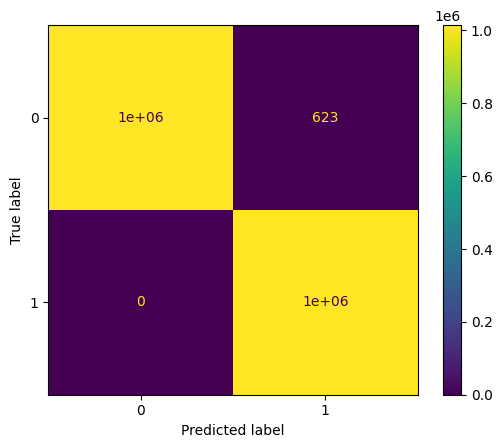

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_pred: np.array = model.predict(X_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_test_pred)
).plot()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014634
           1       1.00      1.00      1.00   1014634

    accuracy                           1.00   2029268
   macro avg       1.00      1.00      1.00   2029268
weighted avg       1.00      1.00      1.00   2029268



In [32]:
og_ds_score: float = model.score(X, y)

print(f"Original dataset score: {og_ds_score:.4f}")

Original dataset score: 0.9998


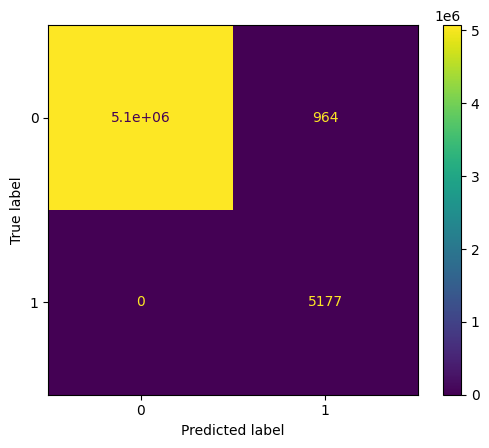

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred: np.array = model.predict(X)
ConfusionMatrixDisplay(
    confusion_matrix(y, y_pred)
).plot()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5073168
           1       0.84      1.00      0.91      5177

    accuracy                           1.00   5078345
   macro avg       0.92      1.00      0.96   5078345
weighted avg       1.00      1.00      1.00   5078345



In [35]:
model_version: int = 1

with open(f"./pickle-dumps/model-{model_version}.pkl", "wb") as f:
    cp.dump(model, f)